<a href="https://colab.research.google.com/github/Atlus501/PyTorch/blob/main/computerVision_stripped.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook will record the section for computer vision problems.

Object detection - "Where's the thing we're looking for?"

Segmentation - "What are the different sections in this image?"

The model that does this is often called a convolutional neural network (CNN)

*torch vision - base domain library

*torchvisioin.datasets - datasets and data loading functions for cv

*torchvision.transforms - functions for manipulating your vision data

*torch.utils.data.Dataset - base dataset class for PyTorch

*torch.utils.data.DataLoader - creates a python iterable over a dataset

In [1]:
#0. CV in python
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn as nn

import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [2]:
import requests
from pathlib import Path

#download helper functions from learn pytorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import accuracy_fn, print_train_time
from timeit import default_timer as timer

#two of the main things you'll want to
#track are the model's prformance and how fast it runs
#but there is often a trade off between these tow metrics

#the below libarry provides a fast, extensible progress bar for loops nd other iterable operations
from tqdm.auto import tqdm

In [3]:
#Setup training data
train_data = datasets.FashionMNIST(
    root="data", #where to download the data
    train=True, #do we want this training dataset
    download=True, #do we want to download yes/no
    transform=ToTensor(), #how do we want to transform the data
    target_transform=None #how do we want to transform the labels/targets
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:00<00:00, 115MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 3.65MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 60.0MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.90MB/s]


In [4]:
#see the first raining example
image = train_data[0][0]
#plt.imshow(image.squeeze(), cmap="gray")
#plt.show()
image.shape

torch.Size([1, 28, 28])

In [5]:
#dataloader would turn our dataset into a Python iterable
#split the data into mini-batches beccause it would be more computationall yefficient.
#it would also give our neural network more chances to update its gradient per epoch.

Batch_size = 32

train_dataloader = DataLoader(dataset= train_data, batch_size= Batch_size, shuffle= True)
test_dataloader = DataLoader(dataset= test_data, batch_size= Batch_size, shuffle= True)

train_features_batch, train_labels_batch = next(iter(train_dataloader))

In [6]:
#build a baseline model
flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x) #perfor the forward pass

In [7]:
class fashionModel(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [10]:
model_0 = fashionModel(input_shape=784, hidden_units=10, output_shape=10)

#setup loss function, optimizer, and evaluation matrices
loss_fn = nn.CrossEntropyLoss() #working with multi-class data
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

import requests
from pathlib import Path

#download helper functions from learn pytorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists


In [11]:
from helper_functions import accuracy_fn, print_train_time
from timeit import default_timer as timer

#two of the main things you'll want to
#track are the model's prformance and how fast it runs
#but there is often a trade off between these tow metrics

#the below libarry provides a fast, extensible progress bar for loops nd other iterable operations
from tqdm.auto import tqdm

torch.manual_seed(42)

train_time_start_on_cpu = timer()

epochs = 0

#this setup will update our model once per batch rather than once per epoch

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_loss = 0

  #add a loop to loop through training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()

    #1 Forward pass
    y_pred = model_0(X)

    #2 Calcualte loss on one batch of data
    loss = loss_fn(y_pred, y)
    train_loss += loss

    #3 Optimizer zero grad
    optimizer.zero_grad()

    #4 loss backward
    loss.backward()

    #5 optimizer step
    optimizer.step()

#the below evaluates the performance of the model
test_loss, test_acc = 0,0
model_0.eval()
with torch.inference_mode():
  for X, y in test_dataloader:
    test_pred = model_0(X)
    test_loss += loss_fn(test_pred, y)
    test_acc += accuracy_fn(y_true = y, y_pred=test_pred.argmax(dim=1))

  test_loss /= len(test_dataloader)
  test_acc /= len(test_dataloader)

  print(f"Loss: {test_loss}. Accuracy: {test_acc}")

#evaluates the total training time of the model
train_time_end_on_cpu = timer()
total_train_time_on_cpu = train_time_end_on_cpu - train_time_start_on_cpu
print(f"Total training time: {total_train_time_on_cpu}")



0it [00:00, ?it/s]

Loss: 2.31899094581604. Accuracy: 10.86261980830671
Total training time: 1.2383760639999934


In [12]:
#4. Make predictions and get model 0 results

device = "cuda" if torch.cuda.is_available() else "cpu"

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device):
  #reurns a ductionary contianing the results of model predicting on data_laoder
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:

      X, y = X.to(device), y.to(device)

      y_pred = model(X)

      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

In [13]:
#set up device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"

#below is a computer vision model that attempts to use non-linearality
class FashionModel_V2(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
    )

  def forward(self, x):
    return self.layer_stack(x)

In [14]:
#the instance of new model

model_1 = FashionModel_V2(input_shape=784,
                          hidden_units=10,
                          output_shape=10).to(device)

In [15]:
device = "cuda" if torch.cuda.is_available() else "cpu"

def train_step(model: nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               device: torch.device,
               optimizer: torch.optim.Optimizer,
               epochs: int):

  train_loss = 0

  for epoch in tqdm(range(epochs)):

    train_loss = 0
    model.train()

    for batch, (X, y) in enumerate(dataloader):

      X, y = X.to(device), y.to(device)

      #1 Forward pass
      y_pred = model(X)

      #2 Calcualte loss on one batch of data
      loss = loss_fn(y_pred, y)
      train_loss += loss.item()

      #3 Optimizer zero grad
      optimizer.zero_grad()

      #4 loss backward
      loss.backward()

      #5 optimizer step
      optimizer.step()

    train_loss /= len(dataloader)
    print(f"Epoch: {epoch}\n-------")
    print(f"Loss: {train_loss}")

In [19]:
eval_model(model = model_1,
           data_loader = test_dataloader,
           loss_fn = loss_fn,
           accuracy_fn = accuracy_fn,
           device = device)

{'model_name': 'FashionModel_V2',
 'model_loss': 0.4701301157474518,
 'model_acc': 83.40654952076677}

In [18]:
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

train_step(model = model_1,
           dataloader = train_dataloader,
           loss_fn = loss_fn,
           optimizer = optimizer,
           device = device,
           epochs = 3)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Loss: 0.594602720006307
Epoch: 1
-------
Loss: 0.4798447546760241
Epoch: 2
-------
Loss: 0.458638995552063


#Model 2. Build a CNN

CNNs are deep learning models designe to process data with a grid like structure.

Also known as CovNets and are known to find patterns within visual data. It is going to compress the image into its most generalizable patterns. And that feature layer is eventuall ygoing to result in a

Similar to what we've just built. We're just going to use different layers. E.g., convolutional layers

In [20]:
class FashionCNN(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        #a convolution layer is going to compress the image
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3, #defines the ?x? square that it is going to provide the operation over
                  stride=1, #the kernal is going to move by one pixel to compress the image
                  padding=1), #adds padding to the image to perform computations over the edges and corners
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, #it is going to a ?x? kernal to return the max number
                     stride=2)
    )
    self.conv_block_3 = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
    )

  def forward(self, x):
    return self.conv_block_3(self.conv_block_2(self.conv_block_1(x)))

In [21]:
model_2 = FashionCNN(input_shape=1, #use 1 because we only have one color channel
                     hidden_units=10,
                     output_shape=10 #use because we have 10 categories of images
                     ).to(device)

In [22]:
#set up a loss function and an optimiser

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [31]:
from timeit import default_timer as timer
train_time_start_model_2 = timer()

train_step(model = model_2,
           dataloader = train_dataloader,
           loss_fn = loss_fn,
           device = device,
           optimizer = optimizer,
           epochs = 3)

train_time_end_model_2 = timer()
print(f"Total train time {train_time_end_model_2 - train_time_start_model_2}")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Loss: 0.23321854009330273
Epoch: 1
-------
Loss: 0.23014227400322756
Epoch: 2
-------
Loss: 0.2297541136033833
Total train time 33.78087074999996


In [32]:
eval_model(model = model_2,
           data_loader = test_dataloader,
           loss_fn = loss_fn,
           accuracy_fn = accuracy_fn,
           device = device)

{'model_name': 'FashionCNN',
 'model_loss': 0.2808772623538971,
 'model_acc': 89.95607028753993}

In [33]:
#making predictions iwth our data
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)

In [34]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=10):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

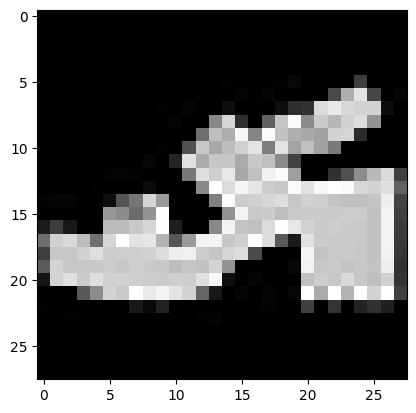

In [35]:
plt.imshow(test_samples[0].squeeze(), cmap="grey")

In [36]:
pred_probs = make_predictions(model = model_2, data = test_samples, device = device)
pred_classes = pred_probs.argmax(dim=1)
class_names = train_data.classes
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1, 9])

ValueError: num must be an integer with 1 <= num <= 9, not 10

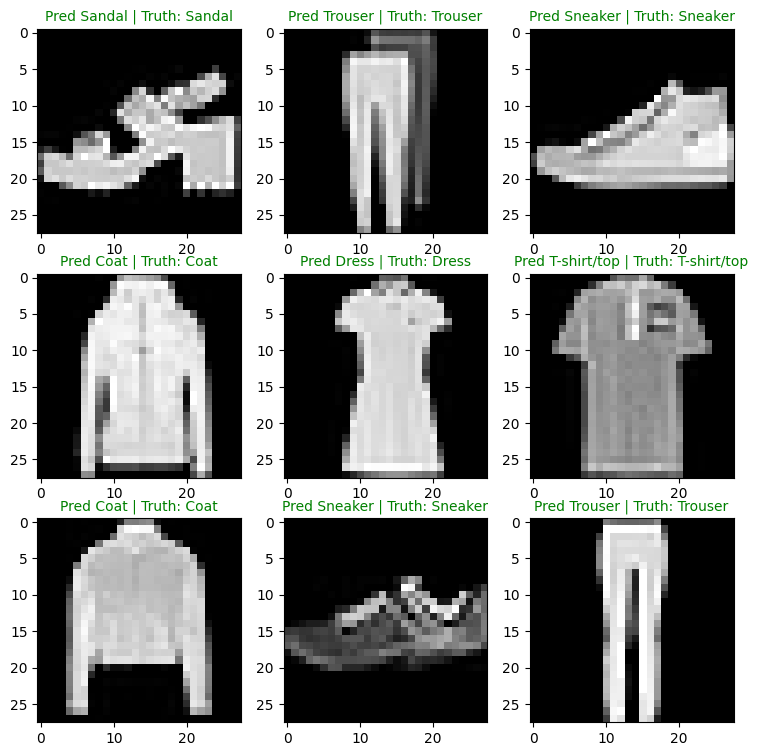

In [37]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap="grey")

  pred_label = class_names[pred_classes[i]]
  truth_label = class_names[test_labels[i]]

  title_text = f"Pred {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize = 10, c="g")
  else:
    plt.title(title_text, fontsize = 10, c = "r")

plt.axis(False)

#Confusion Matrices

A confusion matrix is great for further prediction evaluation

Maybe checkout the book: Machine Learning with PyTorch and Scikit-Learn

A confusion matrix consists of the True positives/negatives and false positives/negatives


In [38]:
#installing package torchmetrics and mlxtend
!pip install torchmetrics -U mlxtend
import torchmetrics
import mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 34.0 MB/s eta 0:00:00


In [39]:
from tqdm.auto import tqdm

y_trues = []
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader):
    X, y = X.to(device), y.to(device)
    y_logit = model_2(X)
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    y_preds.append(y_pred.cpu())
    y_trues.append(y.cpu())

y_pred_tensor = torch.cat(y_preds)
y_true_tensor = torch.cat(y_trues)

  0%|          | 0/313 [00:00<?, ?it/s]

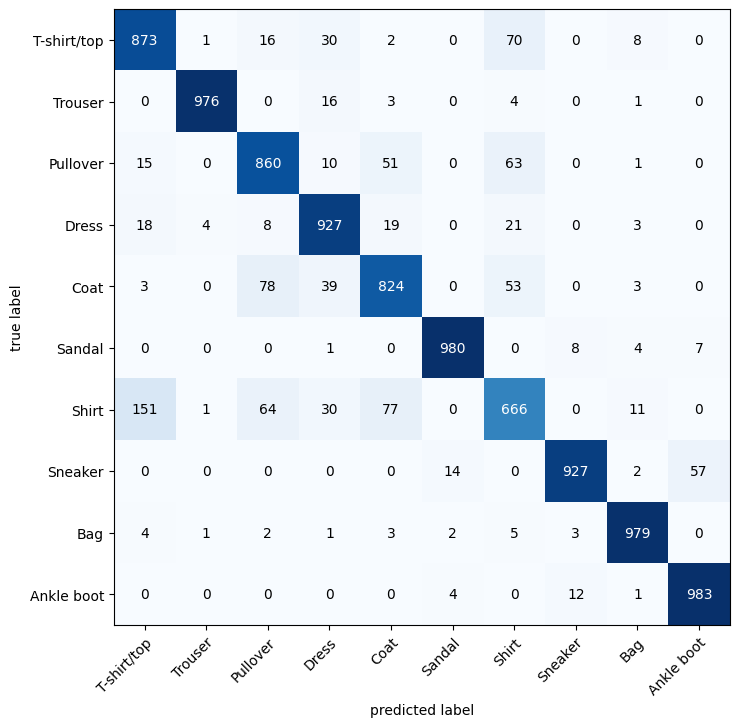

In [40]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes = len(class_names),
                          task = "multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=y_true_tensor)

#3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                figsize=(10,8),
                                class_names=class_names,
                                cmap=plt.cm.Blues)



#Saving and Loading best performing model

In [41]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "0.3_pytorch_cv_model_2.pth"

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to: models/0.3_pytorch_cv_model_2.pth


In [42]:
loaded_model_2 = FashionCNN(input_shape=1,
                            hidden_units=10,
                            output_shape=10).to(device)

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

eval_model(model = loaded_model_2,
           data_loader = test_dataloader,
           loss_fn = loss_fn,
           accuracy_fn = accuracy_fn,
           device = device)

{'model_name': 'FashionCNN',
 'model_loss': 0.2806708812713623,
 'model_acc': 89.95607028753993}